# Craigslist used car sale analysis

In this exercise we will analyze the used car sales on Craigslist. The dataset can be downloaded at https://www.kaggle.com/austinreese/craigslist-carstrucks-data/data. 
    The columns in this table are also listed on this webpage.
    
You can use Pandas to read the data as shown below. There are over 500,000 in this dataset and it may crash your computer during reading the file. We will just analyze the first 50,000 rows.

In [1]:
import pandas as pd
import dask.dataframe as dd
import matplotlib.pyplot as plt

# set the default dpi
plt.rcParams['figure.dpi'] = 100
# here we want to use ggplot style for plots in matplotlib
plt.style.use('ggplot')

In [3]:
# read data
car_sales = pd.read_csv('craigslist-carstrucks-data.zip', nrows=50000) # you could read more rows if your computer has more memory
car_sales.head()

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,drive,size,type,paint_color,image_url,description,county,state,lat,long
0,7088746062,https://greensboro.craigslist.org/ctd/d/cary-2...,greensboro,https://greensboro.craigslist.org,10299,2012.0,acura,tl,NaN,NaN,...,NaN,NaN,other,blue,https://images.craigslist.org/01414_3LIXs9EO33...,2012 Acura TL Base 4dr Sedan Offered by: B...,NaN,nc,35.7636,-78.7443
1,7088745301,https://greensboro.craigslist.org/ctd/d/bmw-3-...,greensboro,https://greensboro.craigslist.org,0,2011.0,bmw,335,NaN,6 cylinders,...,rwd,NaN,convertible,blue,https://images.craigslist.org/00S0S_1kTatLGLxB...,BMW 3 Series 335i Convertible Navigation Dakot...,NaN,nc,NaN,NaN
2,7088744126,https://greensboro.craigslist.org/cto/d/greens...,greensboro,https://greensboro.craigslist.org,9500,2011.0,jaguar,xf,excellent,NaN,...,NaN,NaN,NaN,blue,https://images.craigslist.org/00505_f22HGItCRp...,2011 jaguar XF premium - estate sale. Retired ...,NaN,nc,36.1032,-79.8794
3,7088743681,https://greensboro.craigslist.org/ctd/d/cary-2...,greensboro,https://greensboro.craigslist.org,3995,2004.0,honda,element,NaN,NaN,...,fwd,NaN,SUV,orange,https://images.craigslist.org/00E0E_eAUnhFF86M...,2004 Honda Element LX 4dr SUV Offered by: ...,NaN,nc,35.7636,-78.7443
4,7074612539,https://lincoln.craigslist.org/ctd/d/gretna-20...,lincoln,https://lincoln.craigslist.org,41988,2016.0,chevrolet,silverado k2500hd,NaN,NaN,...,NaN,NaN,NaN,NaN,https://images.craigslist.org/00S0S_8msT7RQquO...,"Shop Indoors, Heated Showroom!!!www.gretnaauto...",NaN,ne,41.1345,-96.2458


### 1: Plot stacked bars of the top five manufacturers for cars with rebult titles and other titles, respectively. 
Hind: plot based on the percentage of the manufacturers in all result-title cars or all other nonclean-title cars.

In [19]:
# filter clean title
dirty_cars = car_sales.query('title_status != "clean"')
dirty_cars

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,drive,size,type,paint_color,image_url,description,county,state,lat,long
28,7088701525,https://greensboro.craigslist.org/cto/d/ashevi...,greensboro,https://greensboro.craigslist.org,16000,2011.0,bmw,535i,excellent,6 cylinders,...,fwd,full-size,sedan,grey,https://images.craigslist.org/00p0p_e9LLsnm2pA...,BMW 535i 2011 TwinPower Turbo F10 Engine: 3....,NaN,nc,35.5895,-82.5671
53,7088670429,https://greensboro.craigslist.org/ctd/d/raleig...,greensboro,https://greensboro.craigslist.org,7590,2014.0,honda,civic lx,excellent,4 cylinders,...,NaN,NaN,NaN,NaN,https://images.craigslist.org/01515_cr2imfgc6j...,extremely clean civic salvaged title low miles...,NaN,nc,35.8014,-78.6877
57,7091444685,https://nashville.craigslist.org/ctd/d/nashvil...,nashville,https://nashville.craigslist.org,7900,2016.0,jeep,patriot,NaN,NaN,...,fwd,NaN,NaN,NaN,https://images.craigslist.org/00p0p_cZZnIrgWf1...,VIN: 1C4NJPBB5GD584134Year: 2016Make: JeepMode...,NaN,tn,36.1460,-86.7550
160,7085296599,https://quadcities.craigslist.org/cto/d/colona...,"quad cities, IA/IL",https://quadcities.craigslist.org,2800,1991.0,NaN,1991,fair,4 cylinders,...,NaN,NaN,convertible,white,https://images.craigslist.org/00N0N_1USTlNIeg8...,Convertible decent car we got to take with cam...,NaN,il,41.4885,-90.3210
170,7085184639,https://quadcities.craigslist.org/cto/d/bellev...,"quad cities, IA/IL",https://quadcities.craigslist.org,14500,2017.0,nissan,nv200 compact cargo,excellent,6 cylinders,...,fwd,compact,van,white,https://images.craigslist.org/00C0C_emBMeeMxfZ...,"White 2017 Nissan NV 200 Cargo D Van. 5,000 mi...",NaN,il,42.2582,-90.4356
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49952,7083917285,https://erie.craigslist.org/ctd/d/erie-2008-gm...,erie,https://erie.craigslist.org,8999,2008.0,gmc,savana cargo van,NaN,8 cylinders,...,rwd,NaN,van,white,https://images.craigslist.org/00i0i_ka3CBwxYCt...,"2008 *GMC* *Savana Cargo Van* RWD 2500 135"" - ...",NaN,pa,42.0738,-80.1484
49988,7083477062,https://erie.craigslist.org/cto/d/erie-2012-fo...,erie,https://erie.craigslist.org,23000,2012.0,ford,f-250 xlt,NaN,8 cylinders,...,4wd,NaN,truck,black,https://images.craigslist.org/00x0x_bCOgClTX1C...,Nice 2012 Ford F-250 XLT with only 61500 miles...,NaN,pa,42.1265,-80.0640
49990,7083451316,https://erie.craigslist.org/ctd/d/erie-2006-fo...,erie,https://erie.craigslist.org,7500,2006.0,ford,ranger,NaN,6 cylinders,...,4wd,NaN,pickup,NaN,https://images.craigslist.org/00f0f_g5eTZsSr9Y...,"2006 *Ford* *Ranger* Truck - $7,500Call Us To...",NaN,pa,42.0738,-80.1484
49994,7083386815,https://erie.craigslist.org/ctd/d/erie-2015-fo...,erie,https://erie.craigslist.org,9750,2015.0,ford,fusion,NaN,4 cylinders,...,fwd,NaN,sedan,black,https://images.craigslist.org/00F0F_hjX8EXbXEi...,"2015 *Ford* *Fusion* 4dr Sedan SE FWD - $9,750...",NaN,pa,42.0738,-80.1484


In [74]:
# aggregation based on manufacturers to get the total number of cars for different manufacturers
car_brands = car_sales.groupby('manufacturer')['price'].count()
# remove those having 100 sales or less
car_brands = car_brands[car_brands > 100]
car_brands

manufacturer
acura             292
audi              481
bmw              1204
buick             656
cadillac          670
chevrolet        7750
chrysler          727
dodge            1684
ford             9260
gmc              2252
honda            2134
hyundai          1156
infiniti          377
jeep             2619
kia               939
lexus             602
lincoln           316
mazda             563
mercedes-benz     848
mercury           160
mini              208
mitsubishi        253
nissan           2656
pontiac           325
ram              2806
rover             174
saturn            147
subaru           1329
toyota           3702
volkswagen       1006
volvo             286
Name: price, dtype: int64

In [83]:
# remove those brands with small sales
dirty_cars = dirty_cars[dirty_cars.manufacturer.isin(car_brands.index)]
dirty_brands = dirty_cars.groupby(['title_status', 'manufacturer']).price.count()
dirty_brands = dirty_brands / car_brands * 100
dirty_brands = dirty_brands.groupby(level='title_status', group_keys=False).apply(
    lambda x: x.sort_values(ascending=False).head(3))
dirty_brands

In [84]:
# transform to 2d table
dirty_brands.unstack()

manufacturer,acura,audi,buick,dodge,lincoln,mercury,nissan,pontiac,ram,rover,subaru
title_status,,,,,,,,,,,
lien,NaN,1.455301,0.914634,NaN,NaN,NaN,NaN,NaN,1.211689,NaN,NaN
missing,NaN,NaN,NaN,0.23753,NaN,0.625,NaN,0.307692,NaN,NaN,NaN
parts only,NaN,NaN,0.152439,NaN,0.316456,NaN,NaN,0.307692,NaN,NaN,NaN
rebuilt,NaN,NaN,NaN,NaN,6.012658,NaN,5.911145,NaN,NaN,NaN,6.094808
salvage,2.39726,NaN,NaN,NaN,1.898734,NaN,NaN,NaN,NaN,2.298851,NaN


[Text(0, 0.5, 'Percentage (%)'), Text(0.5, 0, 'Title Status')]

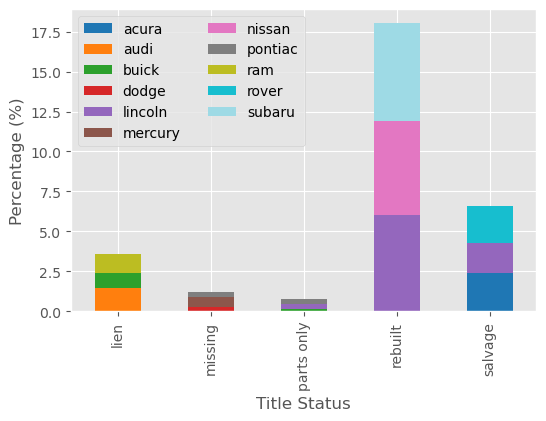

In [95]:
# making the plot
ax = dirty_brands.unstack().plot.bar(stacked=True, cmap='tab20')
ax.legend(loc='upper left', ncol=2)
ax.set(ylabel='Percentage (%)', xlabel='Title Status')

Based on this plot, Lincoln, Nissan and Subara are the top three brands that have the highest rates of rebult titles in the Craigslist market. Lincoln is also one of the most salvaged-title car brands. Based on that information, we should avoid Lincoln on Craigslist.

### 2. Make a stacked area plot for the top five brands with highest Craigslist posts:

 x -- Manufacture year of the car    
 y -- Number of the craigslist posts  
 color -- different manufacturers
 
Analyze plot and see if the sales are related to the US economic or other factors.

In [6]:
# get the top brands
top_brands = car_sales.groupby('manufacturer').price.count().sort_values(ascending=False).iloc[:5]
top_brands

manufacturer
ford         9260
chevrolet    7750
toyota       3702
ram          2806
nissan       2656
Name: price, dtype: int64

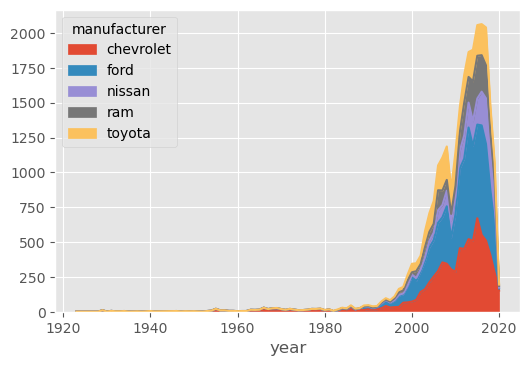

In [12]:
top_sales = car_sales[car_sales.manufacturer.isin(top_brands.index)]
top_sales.groupby(['year', 'manufacturer']).price.count().unstack().plot.area(stacked=True)

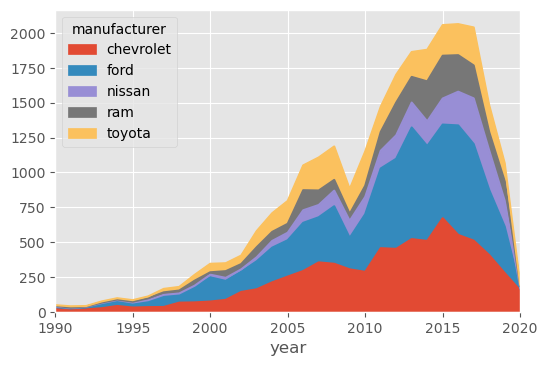

In [13]:
# let's zoom in to the year after 1990 the model year starts to have more posts
top_sales.groupby(['year', 'manufacturer']).price.count().unstack().plot.area(stacked=True, xlim=(1990, 2020))

This plots shows that most people will sell their car within the fourth - sixth year.

### 3. Make a plot to compare the mean price and the 10% and 90% intervel over model years between automatic and manual transmissions; analyze which type of transmission depreciate faster?

 x -- Manufacture year of the car    
 y -- Prices
 color -- different transmissions

In [26]:
transmission_price = car_sales.groupby(['year', 'transmission']).price.agg([
    lambda x: x.quantile(0.1), 
    lambda x: x.quantile(0.5), 
    lambda x: x.quantile(0.9)
    ])
transmission_price = transmission_price.unstack()
transmission_price

<lambda_0>                   <lambda_1>                    \
transmission  automatic   manual    other  automatic   manual    other   
year                                                                     
1900.0           4950.0      NaN      1.0     4950.0      NaN      1.0   
1903.0              NaN      NaN      3.0        NaN      NaN      3.0   
1918.0              NaN  19500.0      NaN        NaN  19500.0      NaN   
1923.0          14000.0      NaN      NaN    14000.0      NaN      NaN   
1925.0          15000.0      NaN      NaN    15000.0      NaN      NaN   
...                 ...      ...      ...        ...      ...      ...   
2017.0              0.0      0.0  13957.6    18902.0  18483.5  19900.0   
2018.0              0.0   3000.0  12946.5    19500.0  20995.0  18500.0   
2019.0              0.0      0.0      0.0    24160.0  17400.0  23300.0   
2020.0              0.0     90.0      0.0    35818.0   2200.0    125.5   
2021.0           1111.0      NaN      NaN     1111.0      NaN      NaN   

             <lambda_2>                    
transmission  automatic   manual    other  
year                                       
1900.0           4950.0      NaN      1.0  
1903.0              NaN      NaN      3.0  
1918.0              NaN  19500.0      NaN  
1923.0          14000.0      NaN      NaN  
1925.0          15000.0      NaN      NaN  
...                 ...      ...      ...  
2017.0          36990.9  34329.4  26800.0  
2018.0          39951.0  40619.0  27970.0  
2019.0          47991.0  32700.0  31800.0  
2020.0          65823.4  41992.0  29999.0  
2021.0           1111.0      NaN      NaN  

[99 rows x 9 columns]

[Text(0, 0.5, 'Price')]

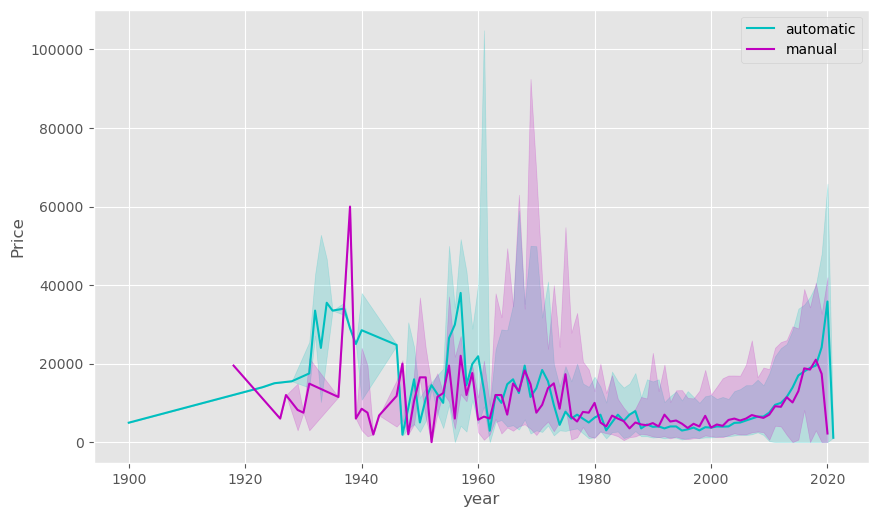

In [53]:
fig, ax = plt.subplots(figsize=(10, 6))
for t, c in [('automatic', 'c'), ('manual', 'm')]:
    # plot median
    s = transmission_price.xs(t, level=1)
    
    s['<lambda_1>'].plot(ax=ax, label=t, color=c, legend=True)    
    ax.fill_between(s.index, s['<lambda_0>'], s['<lambda_2>'], alpha=0.2, color=c)
    
#ax.legend()
ax.set(ylabel='Price')

### 4. Repeat Question 3 for different fuel types.

Instead of plotting in the same chart. Use respective charts (subplots) for different engines.

In [54]:
fuel_price = car_sales.groupby(['year', 'fuel']).price.agg([
    lambda x: x.quantile(0.1), 
    lambda x: x.quantile(0.5), 
    lambda x: x.quantile(0.9)
    ])
fuel_price = fuel_price.unstack()
fuel_price

<lambda_0>                                  <lambda_1>           \
fuel       diesel electric      gas   hybrid other     diesel electric   
year                                                                     
1900.0        1.0      NaN   4950.0      NaN   NaN        1.0      NaN   
1903.0        NaN      NaN      3.0      NaN   NaN        NaN      NaN   
1918.0        NaN      NaN  19500.0      NaN   NaN        NaN      NaN   
1923.0        NaN      NaN  14000.0      NaN   NaN        NaN      NaN   
1925.0        NaN      NaN  15000.0      NaN   NaN        NaN      NaN   
...           ...      ...      ...      ...   ...        ...      ...   
2017.0        0.0   9700.0      0.0      0.0   0.0    39999.0  16500.0   
2018.0        0.0    579.5      0.0      0.0   0.0    43995.0   6645.0   
2019.0    24669.9      NaN      0.0      0.0   0.0    49999.0      NaN   
2020.0    50270.0   2200.0      0.0  34500.0   0.0    65892.0   2200.0   
2021.0        NaN      NaN   1111.0      NaN   NaN        NaN      NaN   

                                  <lambda_2>                             \
fuel        gas   hybrid    other     diesel electric      gas   hybrid   
year                                                                      
1900.0   4950.0      NaN      NaN        1.0      NaN   4950.0      NaN   
1903.0      3.0      NaN      NaN        NaN      NaN      3.0      NaN   
1918.0  19500.0      NaN      NaN        NaN      NaN  19500.0      NaN   
1923.0  14000.0      NaN      NaN        NaN      NaN  14000.0      NaN   
1925.0  15000.0      NaN      NaN        NaN      NaN  15000.0      NaN   
...         ...      ...      ...        ...      ...      ...      ...   
2017.0  18554.0  16500.0  16488.5    56397.8  22546.5  31999.0  23452.0   
2018.0  18900.0  19999.0  15772.0    58199.0  48555.0  34999.7  32599.0   
2019.0  23122.5   9127.5  17988.0    61999.0      NaN  41995.0  41592.5   
2020.0  29999.0  34500.0      1.0    74255.0   2200.0  60022.5  34500.0   
2021.0   1111.0      NaN      NaN        NaN      NaN   1111.0      NaN   

                 
fuel      other  
year             
1900.0      NaN  
1903.0      NaN  
1918.0      NaN  
1923.0      NaN  
1925.0      NaN  
...         ...  
2017.0  39954.5  
2018.0  36928.5  
2019.0  33500.0  
2020.0  21495.0  
2021.0      NaN  

[99 rows x 15 columns]

In [61]:
fuels = fuel_price.columns.get_level_values('fuel').unique()
if 'other' in fuels:
    fuels = list(fuels)
    fuels.remove('other')
    
fuels

['diesel', 'electric', 'gas', 'hybrid']

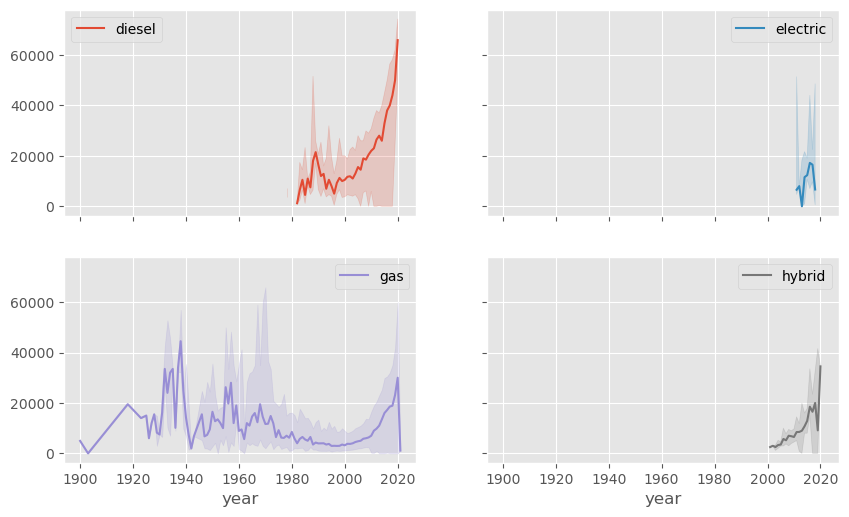

In [68]:
fig, axes = plt.subplots(2, 2, figsize=(10, 6), sharex=True, sharey=True)
axes = axes.flatten()
i = 0
for f, c in zip(fuels, ['C0', 'C1', 'C2', 'C3']):
    ax = axes[i]; i += 1
    # plot median
    s = fuel_price.xs(f, axis=1, level=1)
    
    s['<lambda_1>'].plot(ax=ax, label=f, color=c, legend=True)    
    ax.fill_between(s.index, s['<lambda_0>'], s['<lambda_2>'], alpha=0.2, color=c)
    
#ax.legend()


### 5. If you are going to buy a mid-size sedan and plan to sell it in the fifth year, find a car model will depreciate the least based on the curent Craigslist used car posts.

Make a plot of of percentage of depreciation of the fifth year for different sedan car models

In [78]:
# Here I will just compare camry, fusion, accord
sedan = car_sales.query('year > 2010 and year <= 2020 and type=="sedan"')
sedan = sedan[sedan.model.isin(['camry', 'fusion', 'accord', 'sonata', 'malibu'])]
sedan.groupby(['model', 'year']).price.count()

model   year  
accord  2011.0    10
        2012.0    15
        2013.0     8
        2014.0     9
        2015.0     3
        2016.0     8
        2017.0    19
        2018.0     7
camry   2011.0    13
        2012.0    11
        2013.0     7
        2014.0    11
        2015.0    13
        2016.0     7
        2017.0    22
        2018.0    15
        2019.0    10
fusion  2011.0    13
        2012.0    14
        2013.0     9
        2014.0    17
        2015.0    15
        2016.0    23
        2017.0    28
        2018.0     8
        2019.0     2
        2020.0     1
malibu  2011.0    12
        2012.0     9
        2013.0    11
        2014.0     8
        2015.0    20
        2016.0    17
        2017.0    12
        2018.0    15
        2019.0     6
        2020.0     1
sonata  2011.0    23
        2012.0     7
        2013.0     8
        2014.0     7
        2015.0    33
        2016.0    17
        2017.0     6
        2018.0     5
        2019.0     2
Name: price, dtype: